# mount the colab to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Import torch and check if the gpu available

In [ ]:
import torch

# Check if a GPU is available
torch.cuda.is_available()


True

# open google drive and clone yolov7 repository on it  

In [ ]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [ ]:

!git clone https://github.com/WongKinYiu/yolov7.git

fatal: destination path 'yolov7' already exists and is not an empty directory.


# open cloned yolov7 file and edit configuration file to match the dataset detailes.

In [ ]:
%cd yolov7

/content/drive/MyDrive/yolov7


Edit configuration file to match dataset

Show content of data.yaml file

In [ ]:
!cat /content/drive/MyDrive/BAASYIR_Dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 43
names: ['Basin', 'Bed', 'Cabinet', 'Carpet', 'Ceramic floor', 'Chair', 'Closet', 'Cupboard', 'Curtains', 'Dining Table', 'Door', 'Frame', 'Lamp', 'Nightstand', 'Shelf', 'Sideboard', 'Sikat-Gigi', 'Sofa', 'TV stand', 'Table', 'Toilet', 'Transparent Closet', 'Wall Panel', 'Window', 'Wooden floor', 'basket', 'bath mat', 'bathtub', 'bidet', 'broom', 'faucet', 'hair drier', 'liquid soap dispenser', 'mirror', 'rain shower', 'shampoo', 'shoes', 'shower screen', 'stairs', 'toilet paper', 'toothbrush', 'towel', 'towel holder']

roboflow:
  workspace: baasyir-dataset
  project: baasyir-dataset
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/baasyir-dataset/baasyir-dataset/dataset/1

Rewrite the file data

In [ ]:
%%writefile /content/drive/MyDrive/yolov7/data/data.yaml

train: /content/drive/MyDrive/BAASYIR_Dataset/train
val: /content/drive/MyDrive/BAASYIR_Dataset/valid
test: /content/drive/MyDrive/BAASYIR_Dataset/test


nc: 43
names: ['Basin', 'Bed', 'Cabinet', 'Carpet', 'Ceramic floor', 'Chair', 'Closet', 'Cupboard', 'Curtains', 'Dining Table', 'Door', 'Frame', 'Lamp', 'Nightstand', 'Shelf', 'Sideboard', 'toothbrush', 'Sofa', 'TV stand', 'Table', 'Toilet', 'Transparent Closet', 'Wall Panel', 'Window', 'Wooden floor', 'basket', 'bath mat', 'bathtub', 'bidet', 'broom', 'faucet', 'hair drier', 'liquid soap dispenser', 'mirror', 'rain shower', 'shampoo', 'shoes', 'shower screen', 'stairs', 'toilet paper', 'toothbrush', 'towel', 'towel holder']

roboflow:
  workspace: baasyir-dataset
  project: baasyir-dataset
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/baasyir-dataset/baasyir-dataset/dataset/1

Overwriting /content/drive/MyDrive/yolov7/data/data.yaml


In [ ]:
!cat /content/drive/MyDrive/yolov7/data/data.yaml


train: /content/drive/MyDrive/BAASYIR_Dataset/train
val: /content/drive/MyDrive/BAASYIR_Dataset/valid
test: /content/drive/MyDrive/BAASYIR_Dataset/test


nc: 43
names: ['Basin', 'Bed', 'Cabinet', 'Carpet', 'Ceramic floor', 'Chair', 'Closet', 'Cupboard', 'Curtains', 'Dining Table', 'Door', 'Frame', 'Lamp', 'Nightstand', 'Shelf', 'Sideboard', 'toothbrush', 'Sofa', 'TV stand', 'Table', 'Toilet', 'Transparent Closet', 'Wall Panel', 'Window', 'Wooden floor', 'basket', 'bath mat', 'bathtub', 'bidet', 'broom', 'faucet', 'hair drier', 'liquid soap dispenser', 'mirror', 'rain shower', 'shampoo', 'shoes', 'shower screen', 'stairs', 'toilet paper', 'toothbrush', 'towel', 'towel holder']

roboflow:
  workspace: baasyir-dataset
  project: baasyir-dataset
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/baasyir-dataset/baasyir-dataset/dataset/1


# Install dependencies for YOLOv7

In [ ]:

!pip install -U -r requirements.txt

# Train model yolov7 on our BAASYIR dataset

In [ ]:
!python /content/drive/MyDrive/yolov7/train.py --img-size 640 --batch-size 8 --epochs 100 --data /content/drive/MyDrive/yolov7/data/data.yaml --cfg /content/drive/MyDrive/yolov7/cfg/training/yolov7.yaml --weights /content/drive/MyDrive/yolov7/runs/train/BAASYIRdatasetYolov7/weights/last.pt --device 0 --name BAASYIRdatasetYolov7 --cache-images --resume

2024-01-22 00:14:27.346790: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 00:14:27.346834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 00:14:27.348104: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-22 00:14:27.355235: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-22 00:14:28.340776: W tensorflow/comp

# Evaluation:

 evaluate the model on the validation dataset to check for overfitting, underfitting, and to get an insight into how well the model generalizes to new data.

In [ ]:
!python /content/drive/MyDrive/yolov7/detect.py \
--weights /content/drive/MyDrive/yolov7/runs/train/BAASYIRdatasetYolov7/weights/best.pt \
--img 640 \
--conf 0.25 \
--source /content/drive/MyDrive/BAASYIR_Dataset/valid/images \
--save-txt \
--save-conf


Namespace(weights=['/content/drive/MyDrive/yolov7/runs/train/BAASYIRdatasetYolov7/weights/best.pt'], source='/content/drive/MyDrive/BAASYIR_Dataset/valid/images', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36708320 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _

In [ ]:
import os
import pandas as pd
# Define a function to aggregate detection results from text files.
def aggregate_detections(det_folder):
    data = []
    for file in os.listdir(det_folder):
        if file.endswith(".txt"):
            with open(os.path.join(det_folder, file), 'r') as f:
                for line in f:
                    class_id, x_center, y_center, width, height, conf = map(float, line.split())
                    data.append([file, class_id, x_center, y_center, width, height, conf])

    df = pd.DataFrame(data, columns=['Image', 'Class_ID', 'X_center', 'Y_center', 'Width', 'Height', 'Confidence'])
    return df

# Path to the folder where the text files are saved
det_folder = '/content/drive/MyDrive/yolov7/runs/detect/exp/labels'
df_detections = aggregate_detections(det_folder)

# Now df_detections contains all your detection data
# we can perform various analyses using this DataFrame


In [ ]:
# Count detections per class
detection_counts = df_detections['Class_ID'].value_counts()

# Average confidence score per class
average_confidence = df_detections.groupby('Class_ID')['Confidence'].mean()

print(detection_counts)
print(average_confidence)

17.0    261
19.0     98
1.0      88
30.0     67
23.0     48
20.0     37
2.0      37
25.0     36
14.0     30
5.0      29
0.0      27
29.0      9
16.0      9
33.0      9
8.0       8
36.0      8
31.0      7
38.0      7
9.0       7
6.0       7
13.0      5
27.0      4
22.0      3
41.0      2
12.0      1
15.0      1
24.0      1
18.0      1
Name: Class_ID, dtype: int64
Class_ID
0.0     0.537842
1.0     0.337164
2.0     0.429747
5.0     0.373114
6.0     0.330497
8.0     0.322235
9.0     0.283552
12.0    0.290527
13.0    0.336572
14.0    0.387899
15.0    0.255371
16.0    0.310438
17.0    0.390676
18.0    0.308105
19.0    0.401063
20.0    0.362938
22.0    0.339030
23.0    0.326447
24.0    0.347656
25.0    0.364393
27.0    0.298401
29.0    0.276286
30.0    0.371436
31.0    0.339042
33.0    0.334554
36.0    0.313202
38.0    0.417934
41.0    0.276489
Name: Confidence, dtype: float64


# Create visualizations for the results of object detection evalution


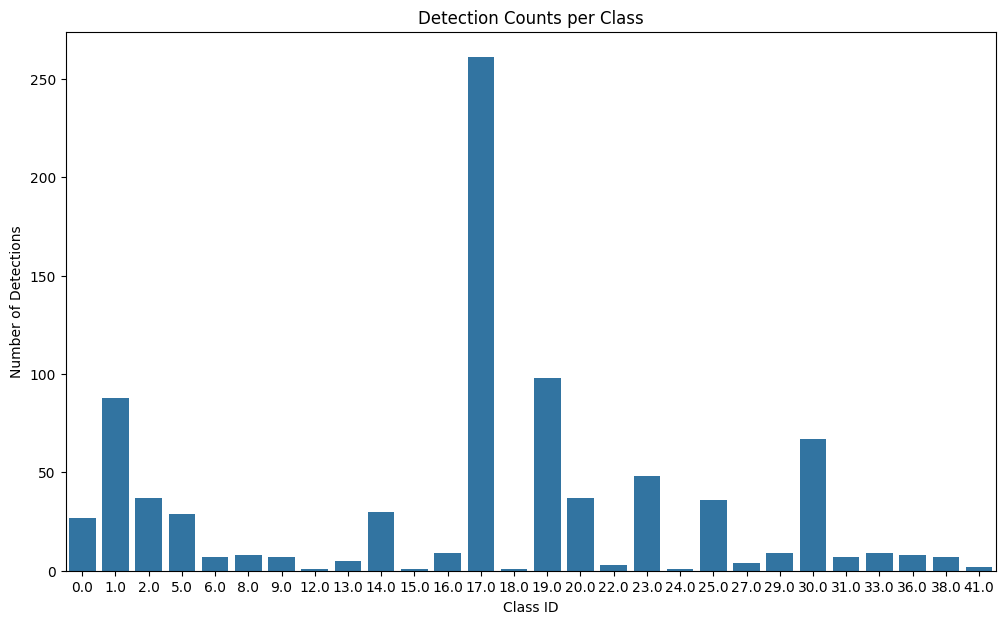

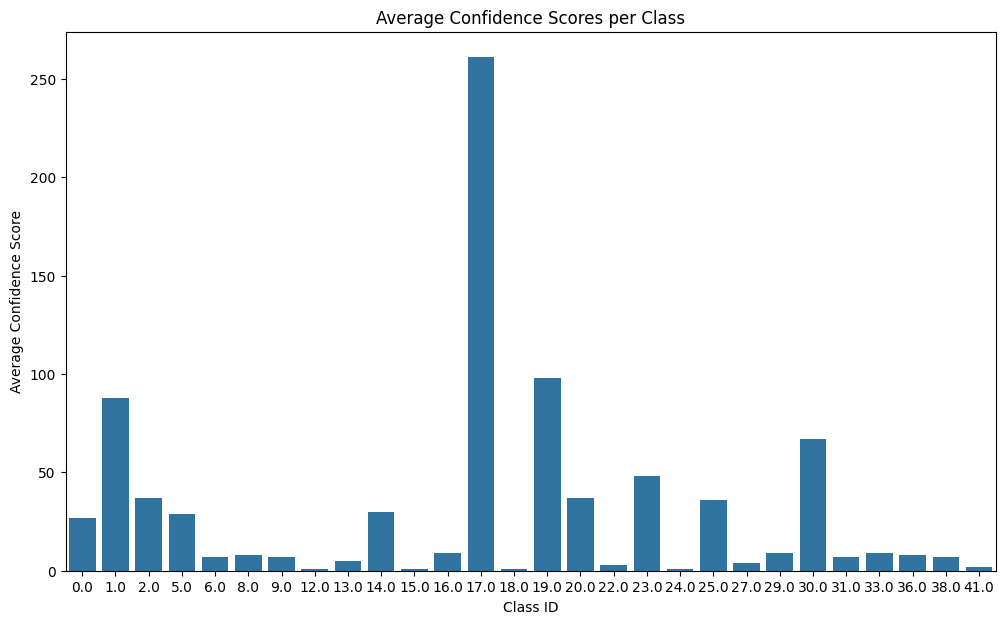

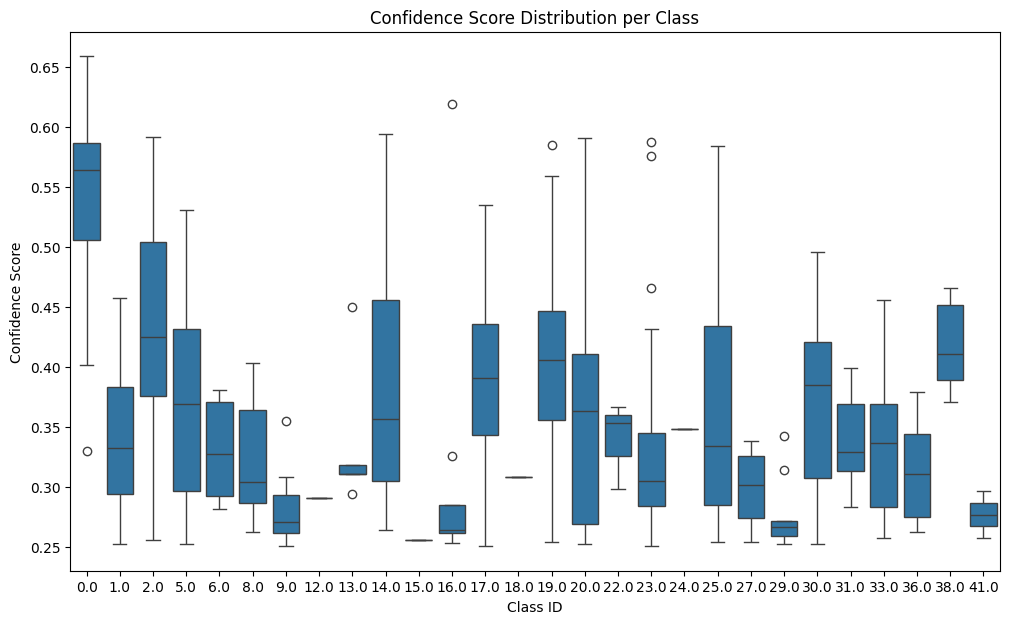

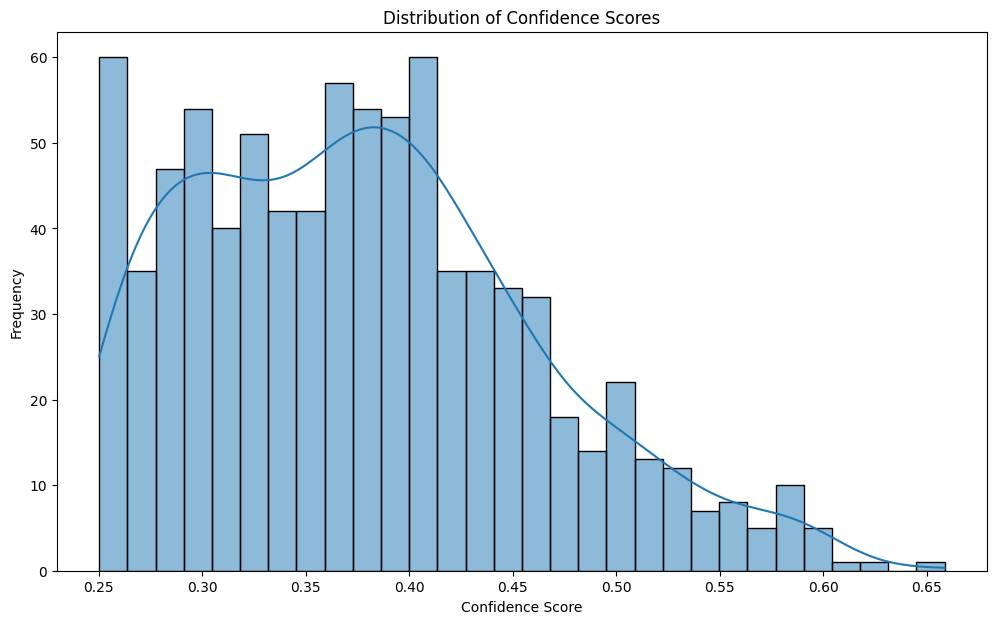

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming detection_counts and average_confidence are already calculated

# Set a larger figure size
plt.figure(figsize=(12, 7))
# Histogram of Detection Counts
sns.barplot(x=detection_counts.index, y=detection_counts.values, data=detection_counts.reset_index())
plt.title('Detection Counts per Class')
plt.xlabel('Class ID')
plt.ylabel('Number of Detections')
plt.show()

plt.figure(figsize=(12, 7))
# Average Confidence Scores per Class
sns.barplot(x=detection_counts.index, y=detection_counts.values, data=detection_counts.reset_index())
plt.title('Average Confidence Scores per Class')
plt.xlabel('Class ID')
plt.ylabel('Average Confidence Score')
plt.show()

plt.figure(figsize=(12, 7))
# Boxplot for Confidence Scores
df_detections_sorted = df_detections.sort_values(by='Class_ID')
sns.boxplot(x='Class_ID', y='Confidence', data=df_detections_sorted)
plt.title('Confidence Score Distribution per Class')
plt.xlabel('Class ID')
plt.ylabel('Confidence Score')
plt.show()

plt.figure(figsize=(12, 7))
# The overall distribution of confidence scores across all detections.
sns.histplot(df_detections['Confidence'], bins=30, kde=True)
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()


# Testing:


In [ ]:
!python /content/drive/MyDrive/yolov7/detect.py \
--weights /content/drive/MyDrive/yolov7/runs/train/BAASYIRdatasetYolov7/weights/best.pt \
--img 640 \
--conf 0.25 \
--source /content/drive/MyDrive/BAASYIR_Dataset/test/images \
--save-txt \
--save-conf \
--name "test_result_yolov7"


Namespace(weights=['/content/drive/MyDrive/yolov7/runs/train/BAASYIRdatasetYolov7/weights/best.pt'], source='/content/drive/MyDrive/BAASYIR_Dataset/test/images', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='test_result_yolov7', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36708320 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:352